# Chapter 2: Drawing with 2D Vectors

## 2.1 Picturing 2D Vectors

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *
from vectors import *
from math import tan, pi, sin, cos, asin, sqrt, acos, atan2
import operator
from random import choice

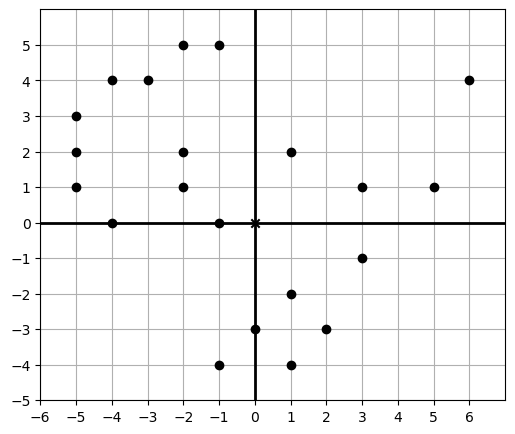

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

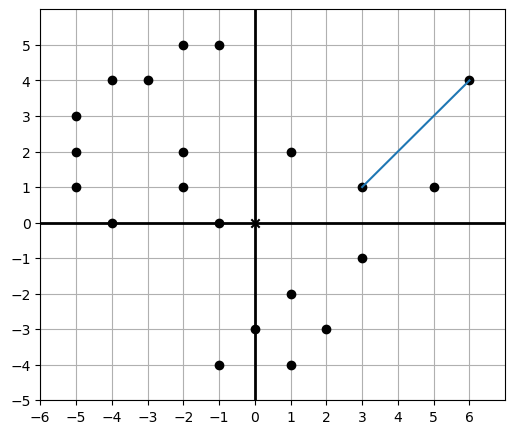

In [3]:
draw(
    Points(*dino_vectors),
    Segment((6,4), (3,1))
)

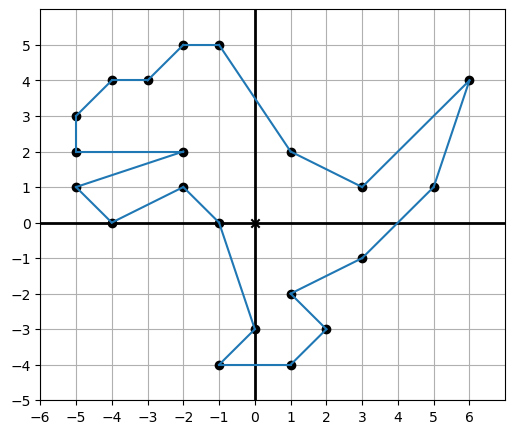

In [4]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

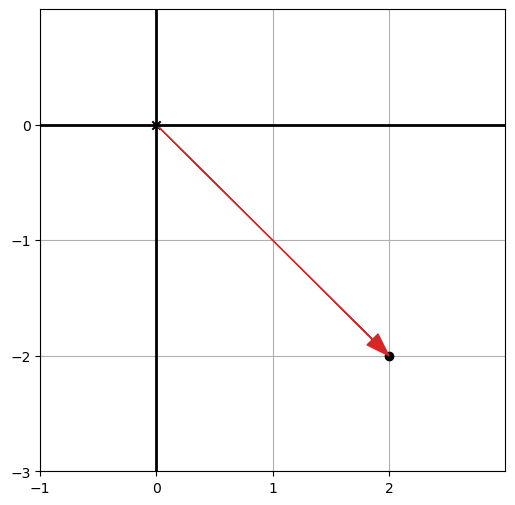

In [5]:
point=(2,-2) 
draw(
    Points(point),
    Arrow(point, (0,0))
)

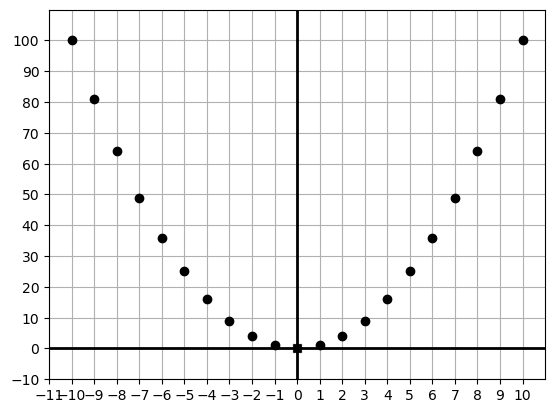

In [6]:
draw(
    Points(*[[x,x**2] for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False
)

## 2.1 Picturing 2D Vectors

In [7]:
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]
dino_vectors2

[(4.5, 1.5),
 (1.5, -1.5),
 (-0.5, -0.5),
 (-2.5, 2.5),
 (-3.5, 2.5),
 (-4.5, 1.5),
 (-5.5, 1.5),
 (-6.5, 0.5),
 (-6.5, -0.5),
 (-3.5, -0.5),
 (-6.5, -1.5),
 (-5.5, -2.5),
 (-3.5, -1.5),
 (-2.5, -2.5),
 (-1.5, -5.5),
 (-2.5, -6.5),
 (-0.5, -6.5),
 (0.5, -5.5),
 (-0.5, -4.5),
 (1.5, -3.5),
 (3.5, -1.5)]

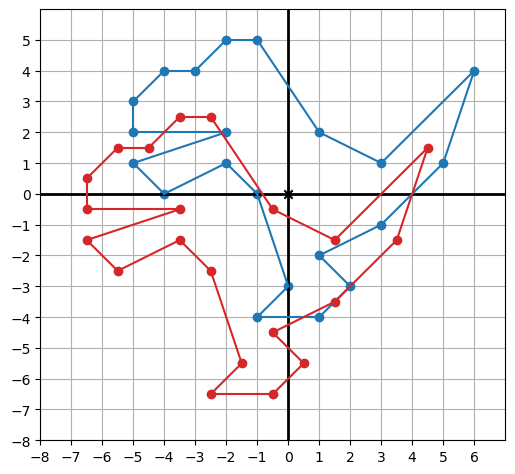

In [8]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

In [9]:
length((4,3))

5.0

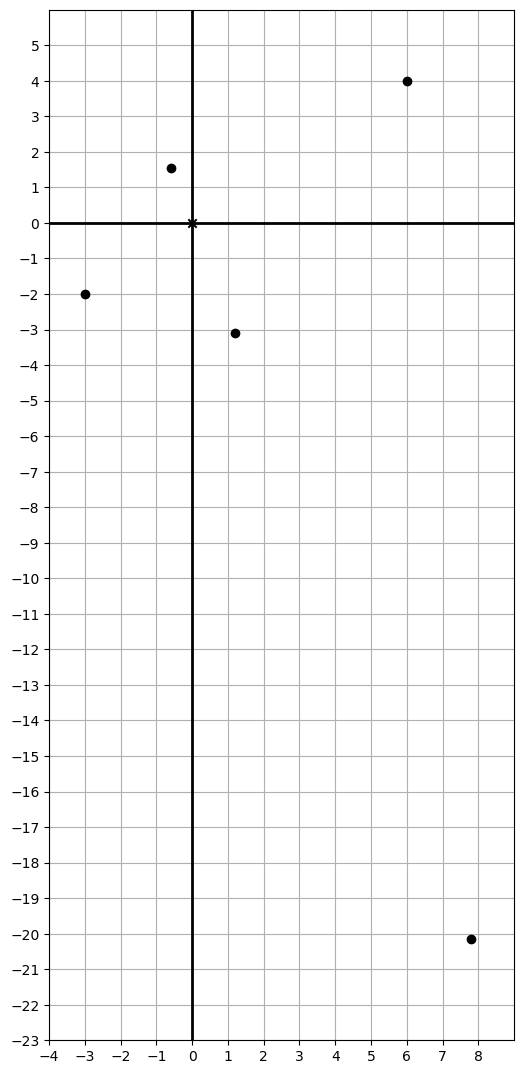

In [10]:
w = (1.2, -3.1)
v = (6, 4)
draw(
    Points(w),
    Points([p * 6.5 for p in w]),
    Points([p * -.5 for p in w]),
    Points(v),
    Points([p * -.5 for p in v])
)

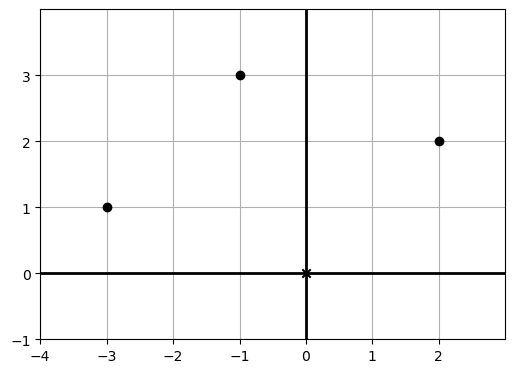

In [11]:
v = (-1, 3)
w = ( 2, 2)

draw(
    Points(*[v, w]),
    Points(subtract(v,w))
)

w=(2, 2) - v=(-1, 3) => subtract(v,w)=(-3, 1)


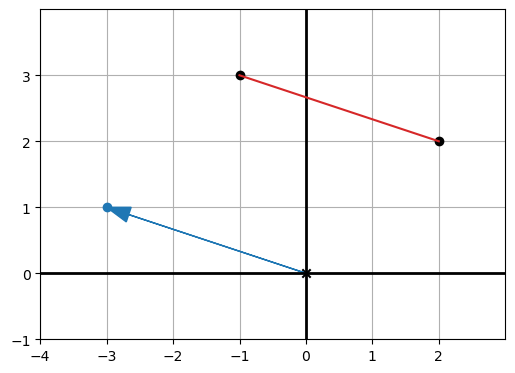

In [12]:
v = (-1, 3)
w = ( 2, 2)
print(f"{w=} - {v=} => {subtract(v,w)=}")
draw(
    Points(*[v, w]),
    Segment(*[v, w], color=red),
    Points(subtract(v,w), color=blue),
    Arrow(subtract(v,w), (0,0), color=blue),    
)

result=(3.5, 2.5)


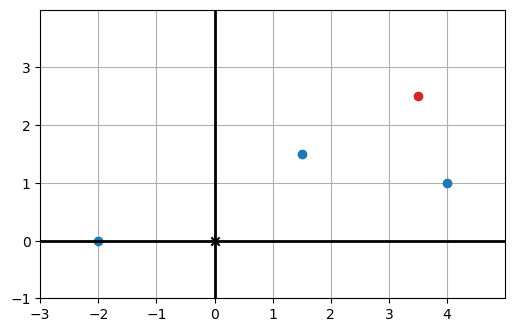

In [13]:
# Exercise 2.6

u = (-2,0)
v = (1.5, 1.5)
w = (4,1)

# result = add(add(u,v), w)
result = add(*[u,v, w])
print(f"{result=}")

draw(
    Points(*[u,v,w], color=blue),
    Points(result, color=red)
)

In [14]:
# Exercise 2.8 - Translate
translate((1,1), [(0,0), (0,1), (-3, -3)])

[(1, 1), (1, 2), (-2, -2)]

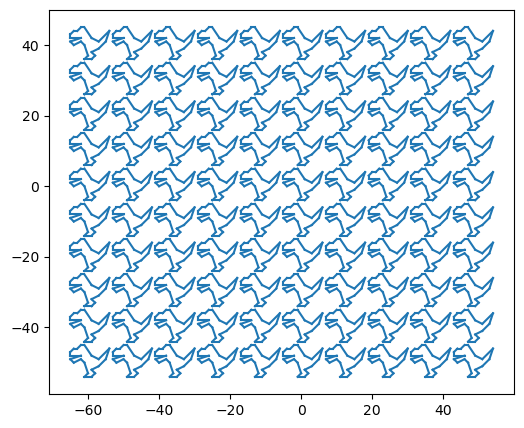

In [15]:
def hundred_dinos():
    translations = [(12 * x, 10 * y)
                    for x in range(-5, 5)
                    for y in range(-5, 5)]
    
    dinos = [Polygon(*translate(t, dino_vectors), color=blue) for t in translations]
    
    draw(*dinos, grid=None, axes=None, origin=None)

hundred_dinos()

In [16]:
# Exercise 2.15
max(dino_vectors, key=length)

(6, 4)

In [17]:
# Exercise 2.17
scale(4, (1,2))

(4, 8)

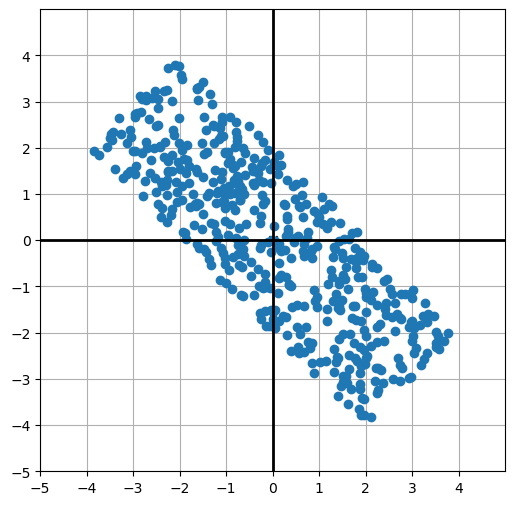

In [18]:
# Exercise 2.19
from random import uniform

u = (-1,1)
v = (1, 1)

def random_r():
    return uniform(-3, 3)

def random_s():
    return uniform(-1, 1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v)) for i in range(0, 500)]

draw(
    Points(*possibilities, color=blue)
)

In [19]:
# Exercise 2.23
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(f"{subtract(v, w)=}")
print(f"{subtract(u, v)=}")
print(f"{subtract(w, v)=}")



subtract(v, w)=(-2.5, 0.5)
subtract(u, v)=(-3.5, -1.5)
subtract(w, v)=(2.5, -0.5)


## 2.3 Angles and trigonometry in the plane

In [20]:
tan(45)

1.6197751905438615

In [21]:
tan(pi/4)

0.9999999999999999

In [22]:
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length * cos(angle), length * sin(angle))

angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [23]:
sin(1)
asin(sin(1))

1.0

In [24]:
# Wrong direction
asin(3/sqrt(13)) * 180 / pi

56.30993247402022

In [25]:
# Correct direction
acos(-2 / sqrt(13)) * 180 / pi

123.6900675259798

In [26]:
atan2(3, 2) * 180 / pi

56.309932474020215

In [27]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return(length(vector), angle)

to_polar((1,0))

(1.0, 0.0)

In [28]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

In [29]:
length((-1.34, 2.68))

2.9963310898497184

In [30]:
# Exercise 2.29
to_cartesian((12,9))

(-10.933563142616123, 4.945421822901079)

In [31]:
angle = 37*pi/180
to_cartesian((15,angle))

(11.979532650709393, 9.027225347280725)

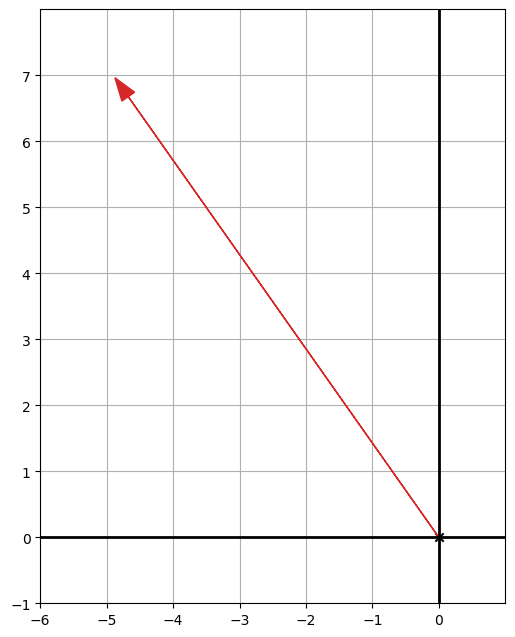

In [32]:
# Exercise 2.30
distance = 8.5
angle = 125*pi/180

draw(
    Arrow(to_cartesian((distance,angle)), (0,0))
)

55.28848080609884


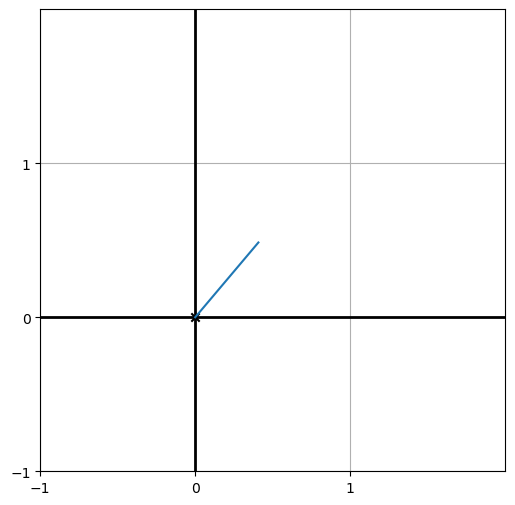

In [33]:
origin = (0,0)
distance = 0.634
print(f"{cos(50) * 180 / pi}")
draw(
    Segment((0,0), to_cartesian((distance, 50 * pi / 180)))
    
)

In [34]:
# Exercise 2.35
angle_d = 116.57
angle_r = angle_d * pi/180

tan(angle_r)


-1.9995682083189954

In [35]:
# Multiple plots with SQ

for i in range(100, 112):
    a = 10
    b = i
    polar_coords = [(cos(a*x*pi/500.0), b*pi*x/1000.0) for x in range(0, 1000)]

    vectors = [to_cartesian(p) for p in polar_coords]

    if False: # disable for now
        draw(
            Polygon(*vectors, color=purple)
        )




In [36]:
# Exercise 2.38
p = (-2,3)
print(to_polar(p))
print(to_polar(p)[1] * 180 / pi)
print(sqrt(13))

(3.605551275463989, 2.158798930342464)
123.69006752597979
3.605551275463989


p_last=(5, 1)
p_current=(6, 4)
p_next=(3, 1)
displacement_a=(-1, -3)
displacement_b=(-3, -3)
angle_r=0.4636476090008059 => angle_d=26.565051177077976


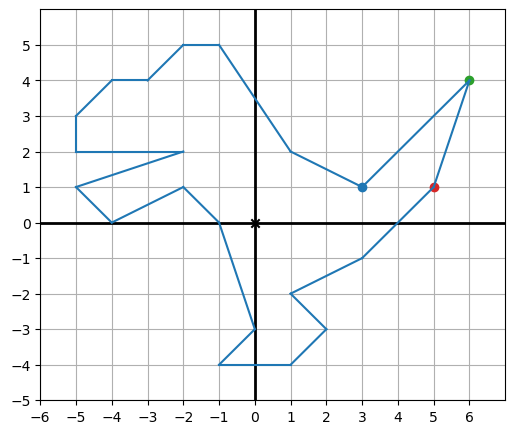

p_last=(-5, 2)
p_current=(-2, 2)
p_next=(-5, 1)
displacement_a=(-3, 0)
displacement_b=(-3, -1)
angle_r=0.3217505543966423 => angle_d=18.434948822922017


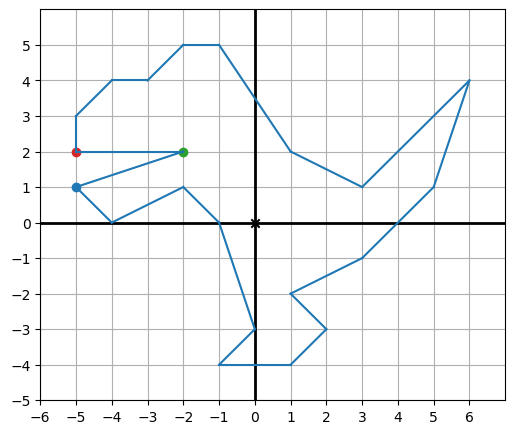

p_last=(0, -3)
p_current=(-1, -4)
p_next=(1, -4)
displacement_a=(1, 1)
displacement_b=(2, 0)
angle_r=0.7853981633974484 => angle_d=45.00000000000001


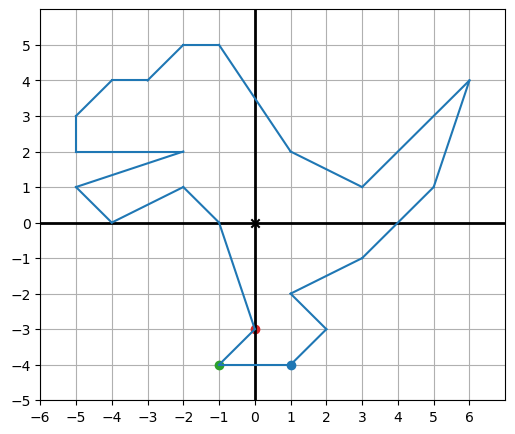

In [37]:
def get_angle(vector1, vector2):
    x1, y1 = vector1
    x2, y2 = vector2
    inner_product = x1*x2 + y1*y2
    len1 = length(vector1)
    len2 = length(vector2)
    return acos(inner_product/(len1*len2))


for i in [0, 9, 15]:

    
    p_last, p_current, p_next = operator.itemgetter(i-1, i, (i+1) % len(dino_vectors))(dino_vectors)
    # p_last = [p_last[1], p_last[0]]
    print(f"{p_last=}")
    print(f"{p_current=}")
    print(f"{p_next=}")
    displacement_a = subtract(p_last, p_current)
    displacement_b = subtract(p_next, p_current)
    print(f"{displacement_a=}")
    print(f"{displacement_b=}")

    angle_r = get_angle(displacement_a, displacement_b)
    # clockwise_angle_r = get_angle(p_last, p_next)
    
    angle_d = angle_r * 180 / pi
    print(f"{angle_r=} => {angle_d=}")
    

    draw(
        Polygon(*dino_vectors),
        Points(p_last, color=red),
        Points(p_current, color=green),
        Points(p_next, color=blue),
    )




    

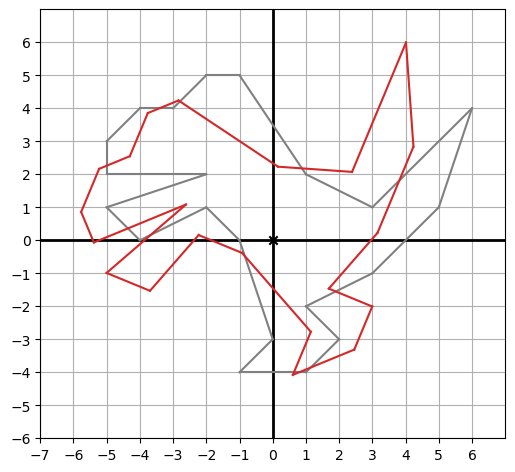

In [38]:
# Rotation
rotation_angle = pi/8
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

segs=[[(3, 0), (4, 0)]]


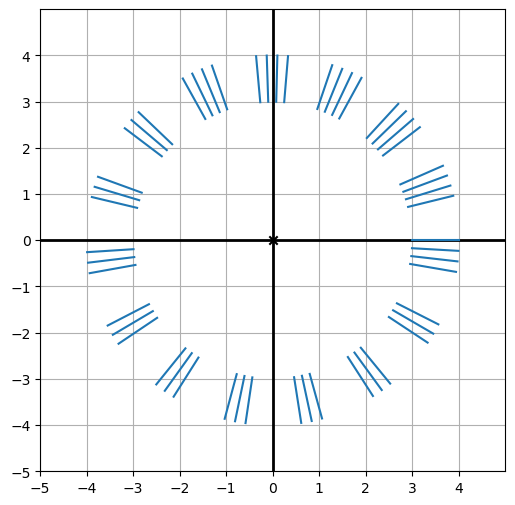

In [39]:
seg = [(3,0), (4,0)]
rotation_angle = 100 / pi
segs = [seg]
print(f"{segs=}")
for i in range(50):
    seg_polar = [to_polar(c) for c in seg]
    # print(f"{seg_polar=}")
    seg_polar_rotated = [(l, a + rotation_angle) for l, a in seg_polar]
    # print(f"{seg_polar_rotated=}")
    seg = [to_cartesian(p) for p in seg_polar_rotated]
    # print(f"{seg=}")
    segs.append(seg)
                             
# print(f"{segs=}")
    

draw(
    *[Segment(s[0], s[1]) for s in segs]
)

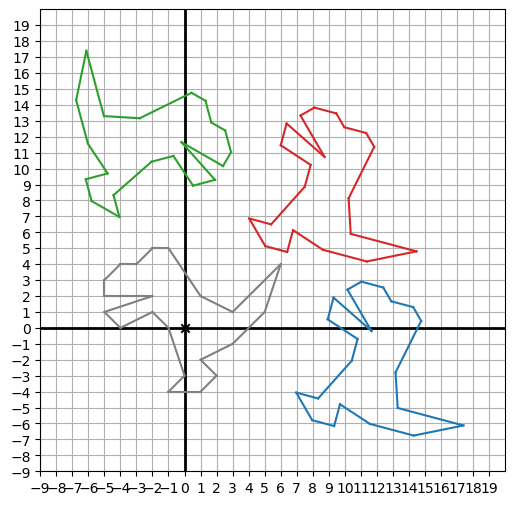

In [50]:
# Rotate then translate vs Translate then rotate
new_dino_rt = translate((8, 8), rotate(5 * pi/3, dino_vectors))
new_dino_tr = rotate(5 * pi/3, (translate((8, 8), dino_vectors)))

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino_rt, color=red),
    Polygon(*new_dino_tr, color=blue),
    # Flip coordinates
    Polygon(*[(i[1], i[0]) for i in new_dino_tr], color=green),
)
    



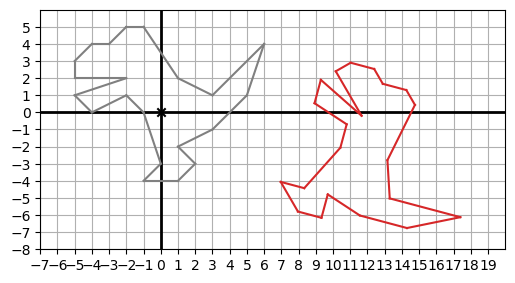

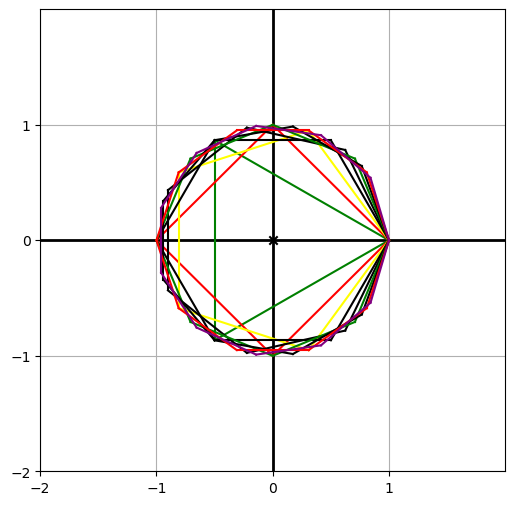

In [42]:
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0, n)]



draw(
    # *[Segment(s[0], s[1]) for s in segs],
    *[Polygon(*regular_polygon(i), color=choice(['green', 'red', 'blue','yellow','black','purple'])) for i in range(3,12)]
)
